In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import missingno as mns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [50]:
df = pd.read_csv('Tweets.csv')

In [51]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

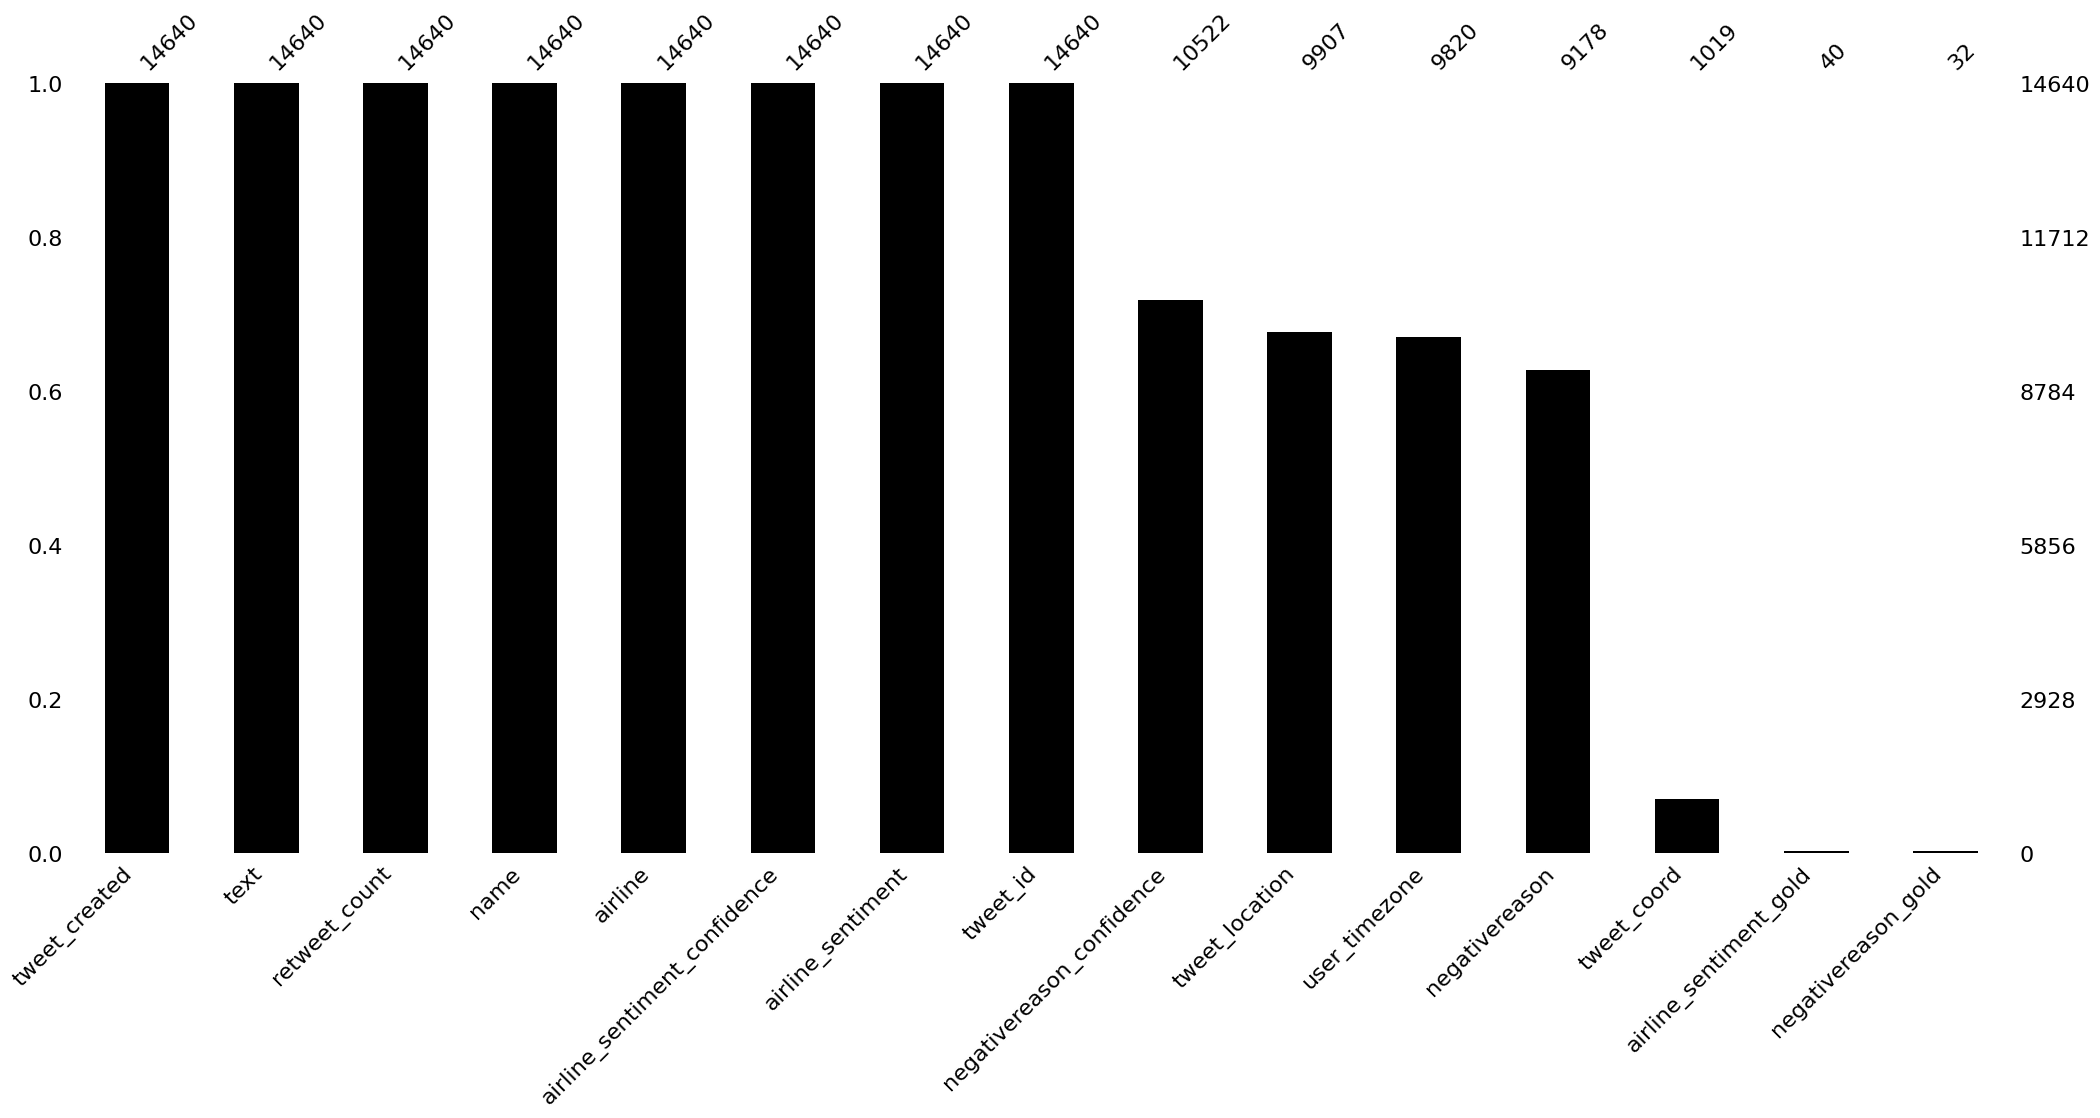

In [52]:
mns.bar(df, color='black', sort='descending')

In [53]:
fig = px.histogram(df, x='airline', color='airline_sentiment', text_auto=True, barmode='group')
fig.show()

In [54]:
fig = px.histogram(df, x='airline', color='negativereason', text_auto=True, barmode='group')
fig.show()

In [55]:
fig = px.histogram(df, x='airline_sentiment', color='negativereason', text_auto=True, barmode='group')
fig.show()

In [56]:
#word cloud: it is a colour graphical repesentation of text

In [57]:
df2 = df[['text','airline_sentiment']]

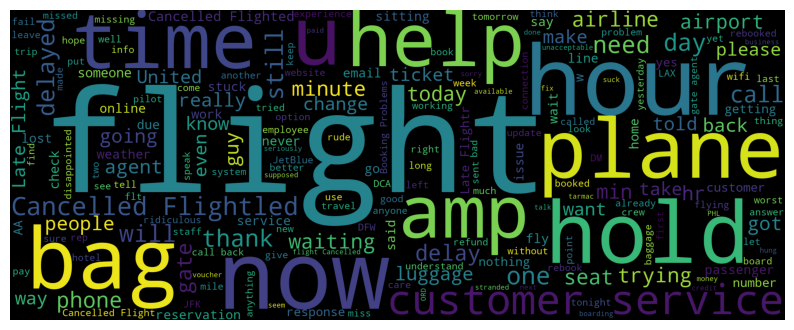

In [58]:
new_data = df2[df2['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000,height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

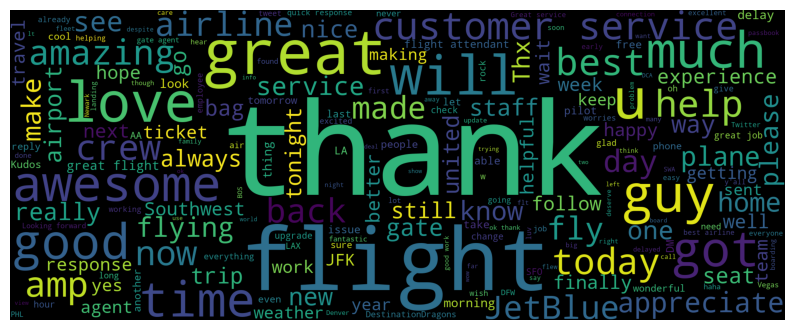

In [59]:
new_data = df2[df2['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000,height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

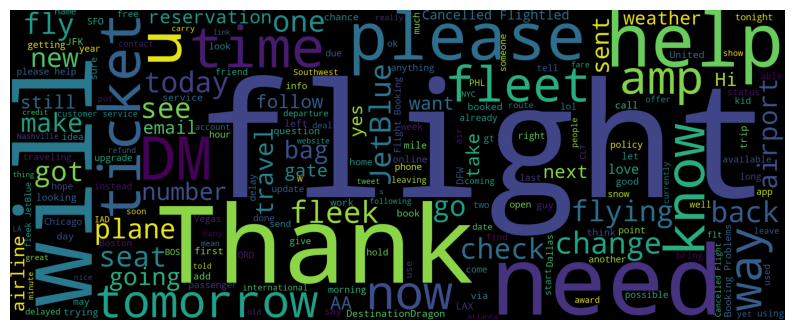

In [60]:
new_data = df2[df2['airline_sentiment']=='neutral']
words = ' '.join(new_data['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000,height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [61]:
#doing class/data balancing using random over balancing
from sklearn.utils import resample
df_neg = df2[df2['airline_sentiment'] == 'negative']
df_neu = df2[df2['airline_sentiment'] == 'neutral']
df_pos = df2[df2['airline_sentiment'] == 'positive']

df_pos_sample = resample(df_pos,n_samples=9178)
df_neu_sample = resample(df_neu,n_samples=9178)

df2 = pd.concat([df_neg,df_pos_sample,df_neu_sample])
df2 = df2.sample(frac=1, ignore_index=True)


In [62]:
text_cleaning_re = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'
def preprocess(x, stem=False):
    x = re.sub(text_cleaning_re,' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(tokens)
df2.text = df2.text.apply(lambda x:preprocess(x))

In [63]:
x = df2.text
y = df2['airline_sentiment']
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [64]:
#we build machine learning
#improve the accuracy
# we deploy it

In [65]:
tcl1 = Pipeline([('Vector',CountVectorizer()), ('Transformer',TfidfTransformer()), ('ALG',BernoulliNB())])
tcl2 = Pipeline([('Vector',CountVectorizer()), ('Transformer',TfidfTransformer()), ('ALG',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [66]:
#training and evaluation of the first model
tcl1.fit(xtrain,ytrain)

Pipeline(steps=[('Vector', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('ALG', BernoulliNB())])

In [67]:
pred_tcl1 = tcl1.predict(xtest)
print(classification_report(ytest,pred_tcl1))

              precision    recall  f1-score   support

    negative       0.85      0.79      0.82      1819
     neutral       0.82      0.79      0.81      1829
    positive       0.82      0.90      0.86      1859

    accuracy                           0.83      5507
   macro avg       0.83      0.83      0.83      5507
weighted avg       0.83      0.83      0.83      5507



In [68]:
tcl1pred = tcl1.predict(xtest)
print(tcl1pred)

['positive' 'positive' 'neutral' ... 'neutral' 'positive' 'negative']


<Axes: >

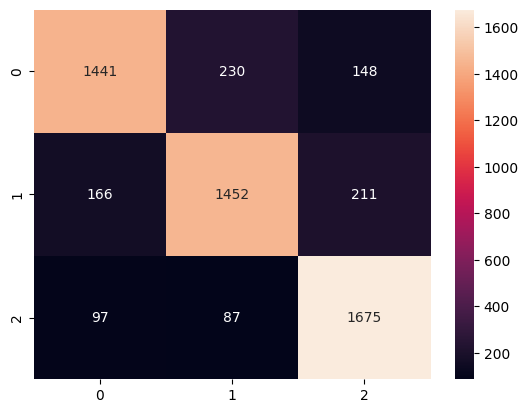

In [69]:
cm1 = confusion_matrix(ytest,tcl1pred)
sns.heatmap(cm1, annot=True, fmt='0.6g')

In [70]:
tcl2.fit(xtrain,ytrain)

Pipeline(steps=[('Vector', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('ALG', MLPClassifier(hidden_layer_sizes=(10, 10)))])

In [71]:
pred_tcl2 = tcl2.predict(xtest)
print(classification_report(ytest,pred_tcl2))

              precision    recall  f1-score   support

    negative       0.94      0.82      0.87      1819
     neutral       0.87      0.94      0.90      1829
    positive       0.93      0.98      0.96      1859

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.91      5507
weighted avg       0.91      0.91      0.91      5507



<Axes: >

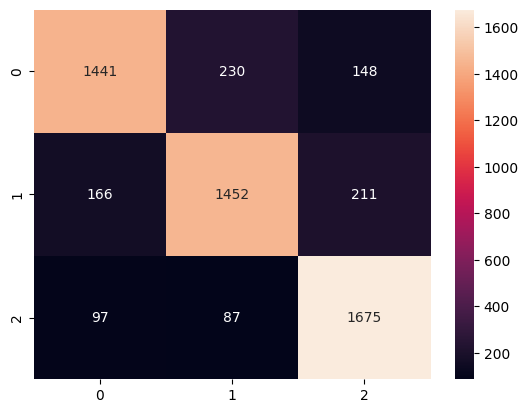

In [72]:
cm2 = confusion_matrix(ytest,pred_tcl2)
sns.heatmap(cm1, annot=True, fmt='0.6g')

In [74]:
usertext = input('Enter your review:')
tcl2.predict([usertext])

array(['positive'], dtype='<U8')